<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Loading-and-Reading-the-data-files" data-toc-modified-id="Loading-and-Reading-the-data-files-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Loading and Reading the data files</a></span></li><li><span><a href="#For-other-time-series" data-toc-modified-id="For-other-time-series-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>For other time series</a></span></li></ul></div>

# Imports

In [5]:
import pandas as pd
from matplotlib import pyplot as plt
import os
from statsmodels.tsa.seasonal import seasonal_decompose
import glob
from datetime import datetime

# Loading and Reading the data files

In [10]:
start_time = datetime.now()
all_csv = glob.glob(f'./data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark/**/*.csv', recursive=True)
end_time = datetime.now()
print(f'Loaded the paths of {len(all_csv)} files from disk. Took {end_time-start_time}')

Loaded the paths of 100 files from disk. Took 0:00:00.008377


In [11]:
all_csv[0]

'./data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark\\synthetic_1.csv'

In [13]:
df= pd.read_csv(all_csv[0])
df

,timestamp,value,is_anomaly
0,1416726000,13.894031,0
1,1416729600,33.578274,0
2,1416733200,88.933746,0
3,1416736800,125.389424,0
4,1416740400,152.962000,0
...,...,...,...
1416,1421823600,-141.419766,0
1417,1421827200,-139.657834,0
1418,1421830800,-70.550652,0
1419,1421834400,-16.857148,0


In [14]:
df.describe()

,timestamp,value,is_anomaly
count,1.421000e+03,1421.000000,1421.000000
mean,1.419282e+09,6.368346,0.002815
std,1.477266e+06,987.768206,0.053000
min,1.416726e+09,-1421.039008,0.000000
25%,1.418004e+09,-976.854162,0.000000
50%,1.419282e+09,12.969502,0.000000
75%,1.420560e+09,989.025992,0.000000
max,1.421838e+09,1416.912543,1.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   timestamp   1421 non-null   int64  
 1   value       1421 non-null   float64
 2   is_anomaly  1421 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 33.4 KB


Now we change the timestamp colump from unix seconds after epoch to a human readable date-time stamp   

In [20]:
df['timestamp'] = pd.to_datetime(df['timestamp'],unit='s')#format='%f' if formatting required upto nanoseconds

In [21]:
df

,timestamp,value,is_anomaly
0,2014-11-23 07:00:00,13.894031,0
1,2014-11-23 08:00:00,33.578274,0
2,2014-11-23 09:00:00,88.933746,0
3,2014-11-23 10:00:00,125.389424,0
4,2014-11-23 11:00:00,152.962000,0
...,...,...,...
1416,2015-01-21 07:00:00,-141.419766,0
1417,2015-01-21 08:00:00,-139.657834,0
1418,2015-01-21 09:00:00,-70.550652,0
1419,2015-01-21 10:00:00,-16.857148,0


In [22]:
df_indexed = df.set_index('timestamp')

print(df_indexed.info())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1421 entries, 2014-11-23 07:00:00 to 2015-01-21 11:00:00
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   value       1421 non-null   float64
 1   is_anomaly  1421 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 33.3 KB
None


In [23]:
# Additive Decomposition
result_add = seasonal_decompose(df_indexed['value'], model='additive', extrapolate_trend='freq')

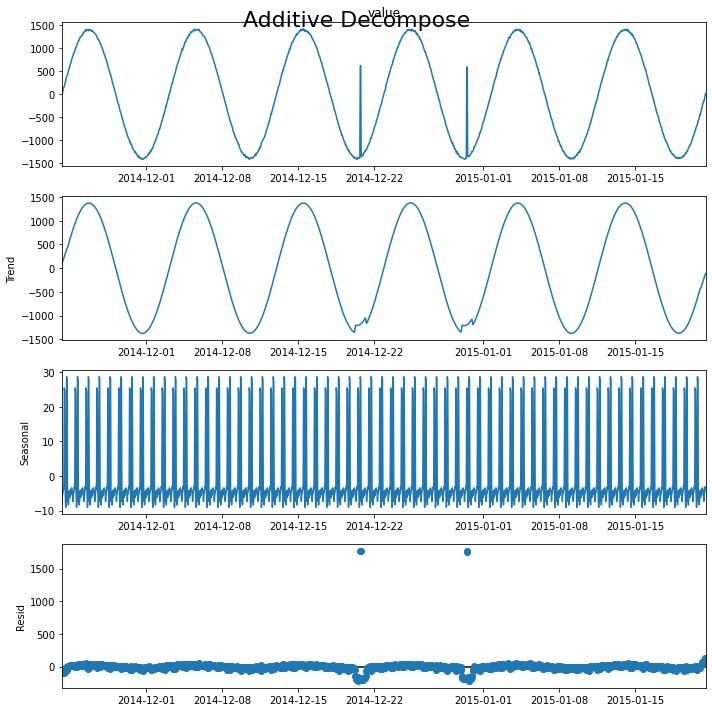

In [26]:
# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
#result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

In [28]:
threshold=500
residualdf = result_add.resid
outliers = residualdf[residualdf > threshold]
print(f"File: {all_csv[0]}")
print("threshold: 500")
print("Outliers:")
print(outliers)

File: ./data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark\synthetic_1.csv
threshold: 500
Outliers:
timestamp
2014-12-20 17:00:00    1772.222450
2014-12-20 18:00:00    1766.344219
2014-12-30 12:00:00    1760.350798
2014-12-30 13:00:00    1755.882094
Name: resid, dtype: float64


Note that the presence of negative and zero values make it such that multiplicative decomposition is not applicable for these time series.

# For other time series

Now Let's try doing this for all the other 99 time series in a loop

Processing index: 0 of 100



A2Benchmark_synthetic_1add_STL


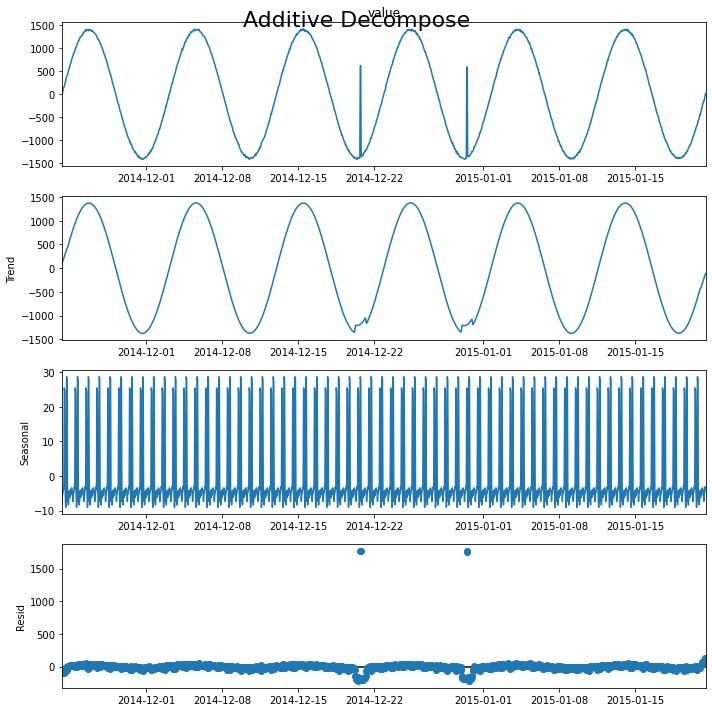



File: synthetic_1
threshold: 500
Outliers:
timestamp
2014-12-20 17:00:00    1772.222450
2014-12-20 18:00:00    1766.344219
2014-12-30 12:00:00    1760.350798
2014-12-30 13:00:00    1755.882094
Name: resid, dtype: float64



A2Benchmark_synthetic_10add_STL


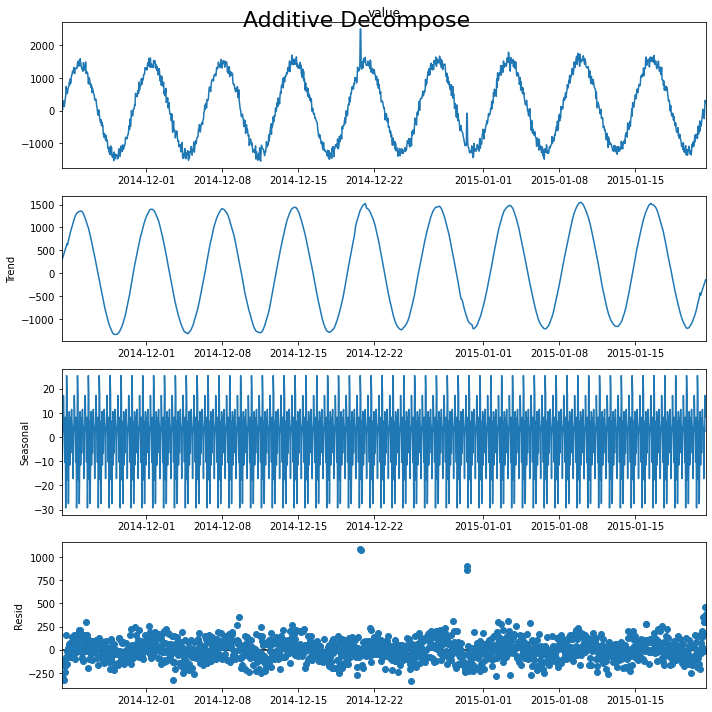



File: synthetic_10
threshold: 500
Outliers:
timestamp
2014-12-20 17:00:00    1088.668787
2014-12-20 18:00:00    1077.463440
2014-12-30 12:00:00     861.051098
2014-12-30 13:00:00     900.266830
Name: resid, dtype: float64



A2Benchmark_synthetic_100add_STL


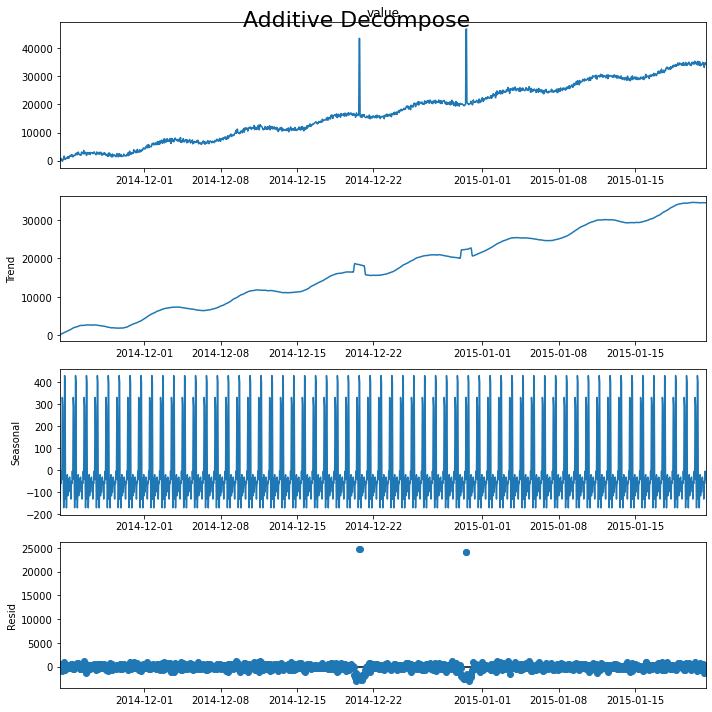



File: synthetic_100
threshold: 500
Outliers:
timestamp
2014-11-23 07:00:00     510.047397
2014-11-23 16:00:00    1023.235688
2014-11-24 09:00:00     525.001815
2014-11-24 19:00:00     564.290616
2014-11-24 21:00:00     714.436649
                          ...     
2015-01-19 22:00:00     698.636921
2015-01-20 11:00:00     888.408219
2015-01-20 14:00:00     565.266072
2015-01-20 22:00:00     825.323223
2015-01-21 05:00:00     574.096495
Name: resid, Length: 172, dtype: float64



A2Benchmark_synthetic_11add_STL


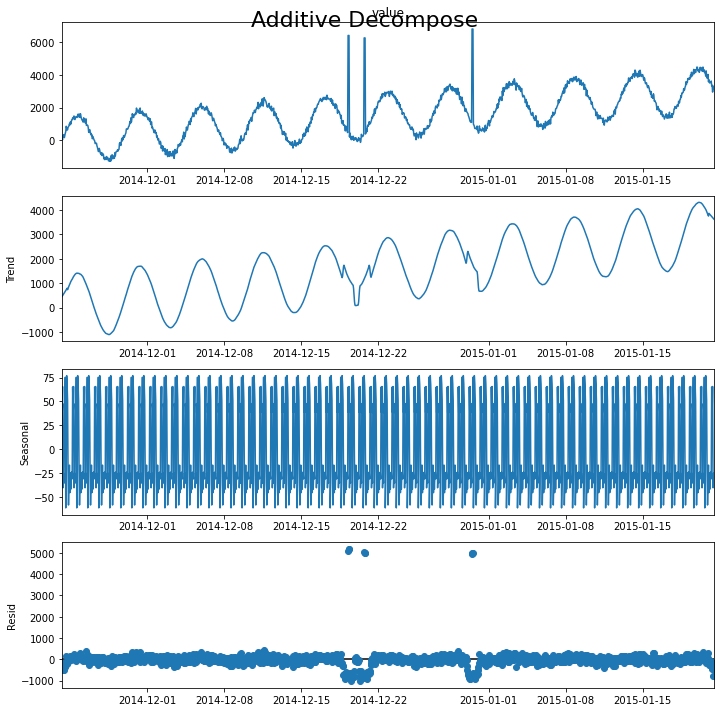



File: synthetic_11
threshold: 500
Outliers:
timestamp
2014-12-19 06:00:00    5097.655201
2014-12-19 07:00:00    5170.747173
2014-12-19 08:00:00    5184.493836
2014-12-20 17:00:00    5028.454984
2014-12-20 18:00:00    4999.506151
2014-12-20 19:00:00    4975.421031
2014-12-30 12:00:00    4941.587483
2014-12-30 13:00:00    4999.870276
2014-12-30 14:00:00    5013.014486
Name: resid, dtype: float64



A2Benchmark_synthetic_12add_STL


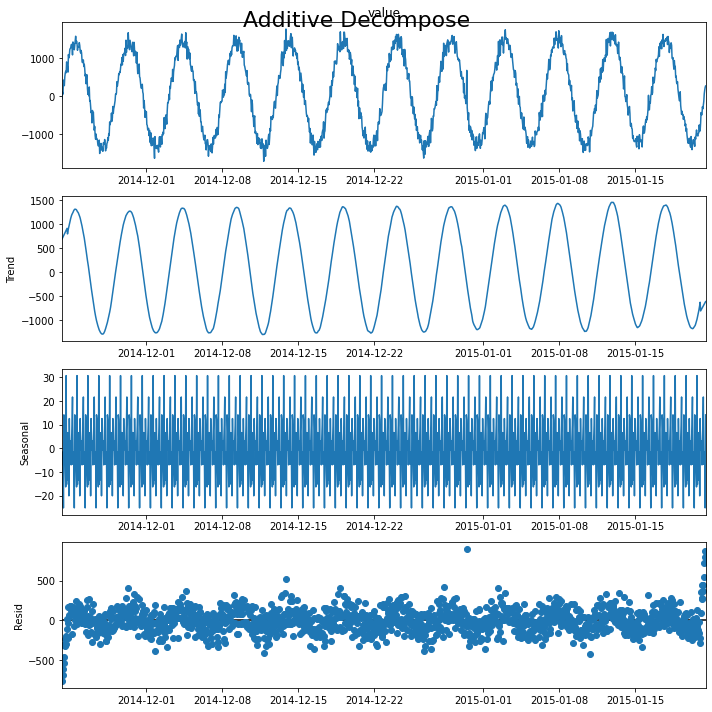



File: synthetic_12
threshold: 500
Outliers:
timestamp
2014-12-13 21:00:00    518.229909
2014-12-30 12:00:00    899.590151
2015-01-21 07:00:00    546.091961
2015-01-21 08:00:00    719.254489
2015-01-21 09:00:00    800.955609
2015-01-21 10:00:00    878.920756
2015-01-21 11:00:00    859.589505
Name: resid, dtype: float64



A2Benchmark_synthetic_13add_STL


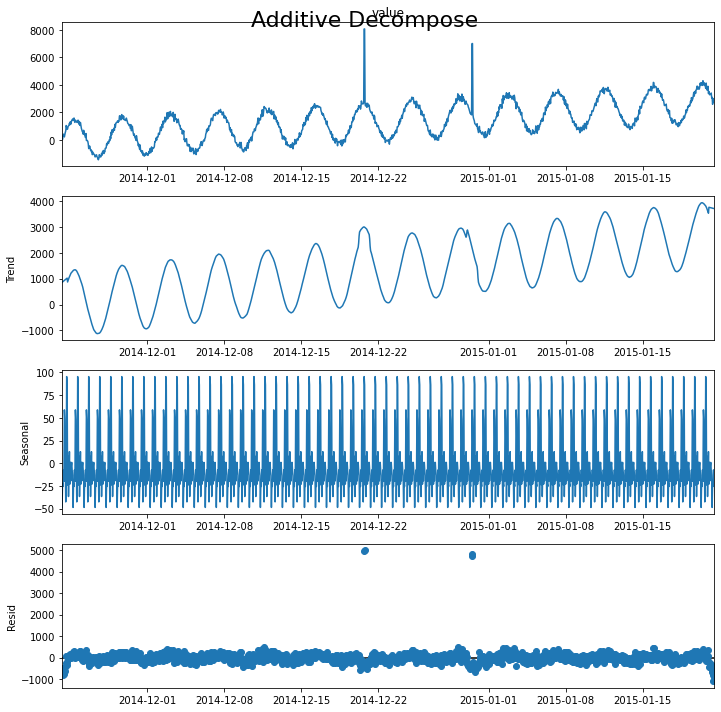



File: synthetic_13
threshold: 500
Outliers:
timestamp
2014-12-20 17:00:00    4966.348775
2014-12-20 18:00:00    4986.096620
2014-12-29 05:00:00     505.866852
2014-12-30 12:00:00    4733.056532
2014-12-30 13:00:00    4821.207605
Name: resid, dtype: float64



A2Benchmark_synthetic_14add_STL


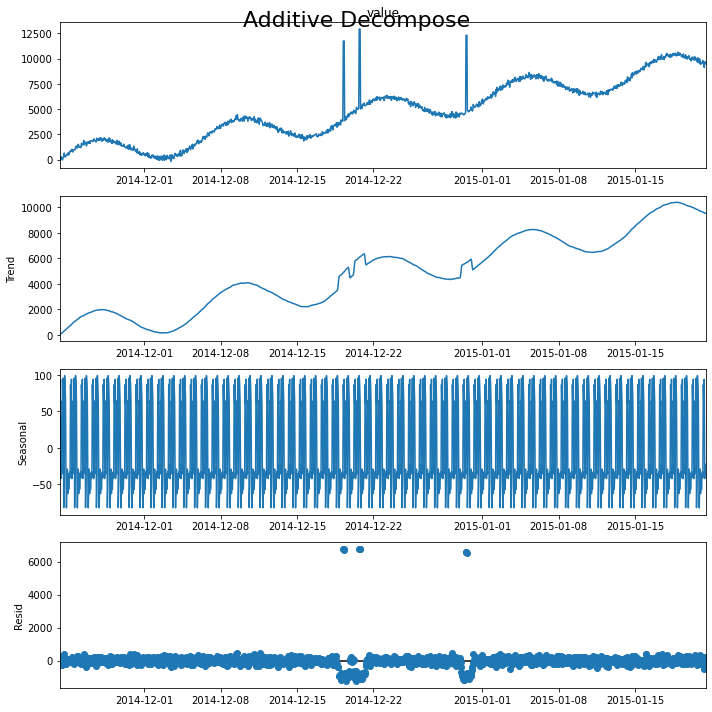



File: synthetic_14
threshold: 500
Outliers:
timestamp
2014-12-19 06:00:00    6769.365597
2014-12-19 07:00:00    6762.466346
2014-12-19 08:00:00    6692.283881
2014-12-20 17:00:00    6760.127091
2014-12-20 18:00:00    6749.287440
2014-12-20 19:00:00    6749.407831
2014-12-30 12:00:00    6600.879257
2014-12-30 13:00:00    6598.191189
2014-12-30 14:00:00    6539.964757
Name: resid, dtype: float64



A2Benchmark_synthetic_15add_STL


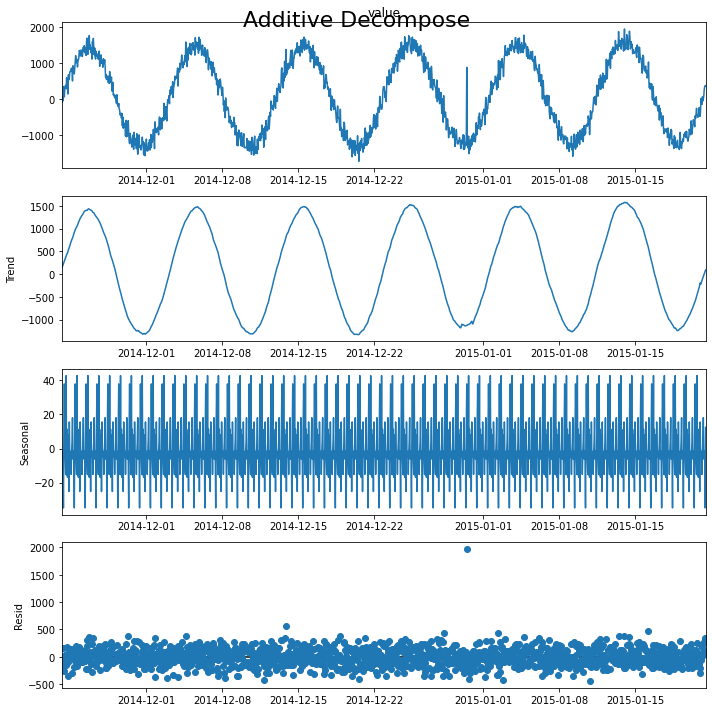



File: synthetic_15
threshold: 500
Outliers:
timestamp
2014-12-13 21:00:00     555.685017
2014-12-30 12:00:00    1973.810656
Name: resid, dtype: float64



A2Benchmark_synthetic_16add_STL


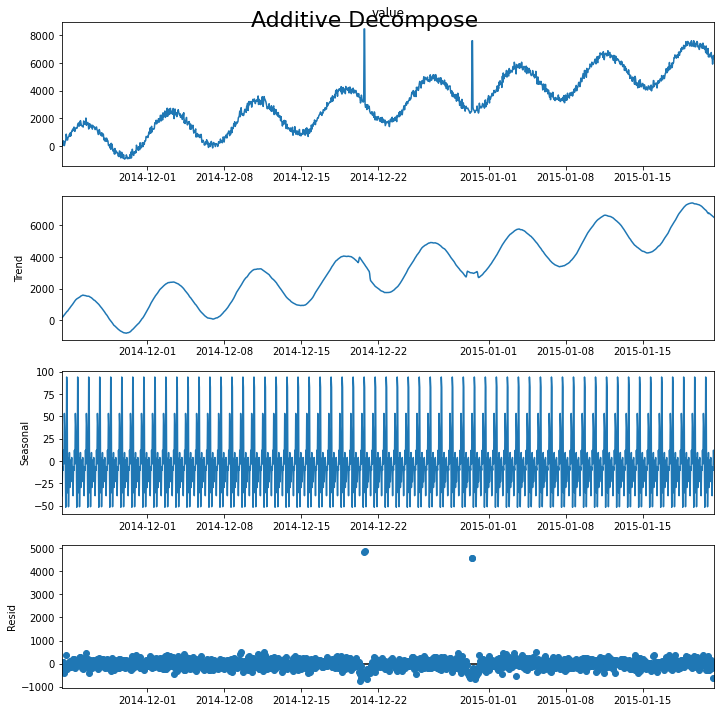



File: synthetic_16
threshold: 500
Outliers:
timestamp
2014-12-09 13:00:00     514.105247
2014-12-11 15:00:00     513.102094
2014-12-20 17:00:00    4816.755116
2014-12-20 18:00:00    4877.904403
2014-12-30 12:00:00    4569.638451
2014-12-30 13:00:00    4593.284562
2015-01-05 07:00:00     502.952377
Name: resid, dtype: float64



A2Benchmark_synthetic_17add_STL


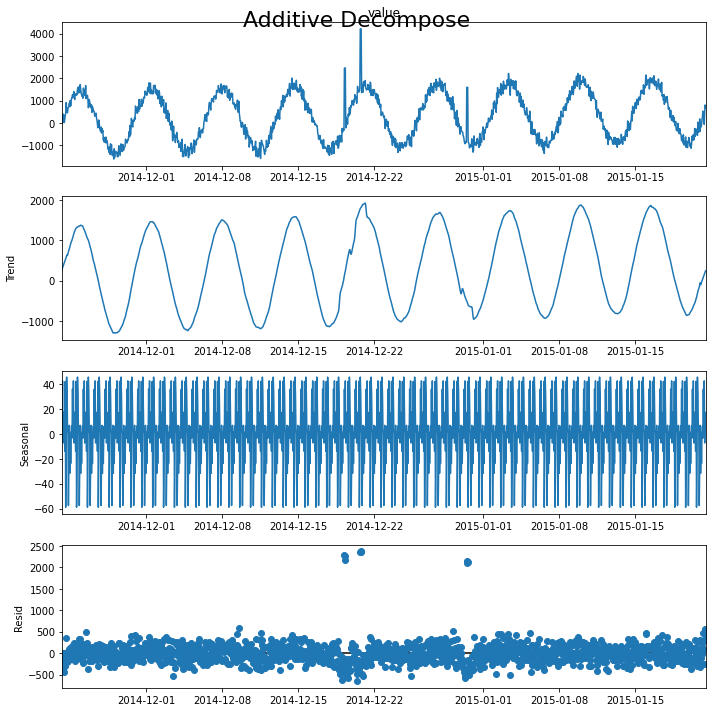



File: synthetic_17
threshold: 500
Outliers:
timestamp
2014-12-09 13:00:00     594.849188
2014-12-19 06:00:00    2287.358933
2014-12-19 07:00:00    2271.483046
2014-12-19 08:00:00    2174.836732
2014-12-20 17:00:00    2366.885292
2014-12-20 18:00:00    2364.824872
2014-12-20 19:00:00    2376.670578
2014-12-29 05:00:00     521.451642
2014-12-30 12:00:00    2094.114192
2014-12-30 13:00:00    2141.610494
2014-12-30 14:00:00    2120.512364
2015-01-21 10:00:00     570.142923
Name: resid, dtype: float64
Processing index: 10 of 100



A2Benchmark_synthetic_18add_STL


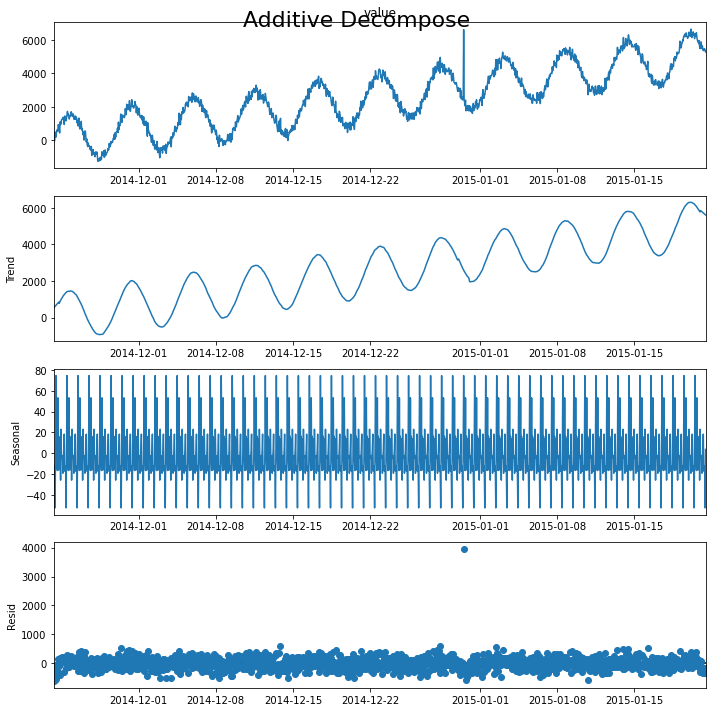



File: synthetic_18
threshold: 500
Outliers:
timestamp
2014-11-29 09:00:00     519.952196
2014-12-13 21:00:00     588.323442
2014-12-28 09:00:00     613.806239
2014-12-30 12:00:00    3954.592070
2015-01-02 10:00:00     566.404252
2015-01-16 05:00:00     523.896653
Name: resid, dtype: float64



A2Benchmark_synthetic_19add_STL


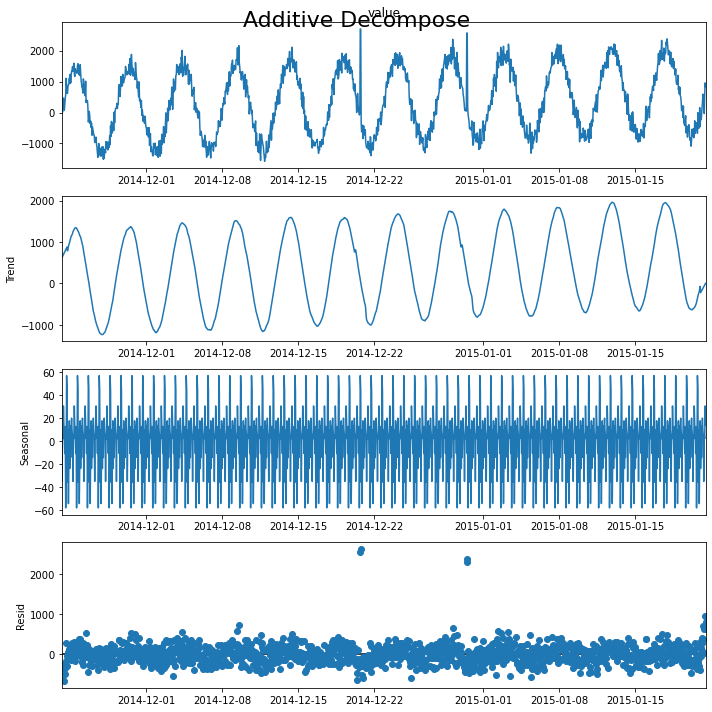



File: synthetic_19
threshold: 500
Outliers:
timestamp
2014-11-25 11:00:00     520.980222
2014-11-29 16:00:00     539.124376
2014-11-30 01:00:00     515.787585
2014-12-04 08:00:00     541.564093
2014-12-09 10:00:00     570.088062
2014-12-09 13:00:00     738.338568
2014-12-14 10:00:00     502.951752
2014-12-20 17:00:00    2543.158313
2014-12-20 18:00:00    2630.254526
2014-12-29 05:00:00     646.398768
2014-12-30 12:00:00    2303.094641
2014-12-30 13:00:00    2389.841862
2015-01-02 08:00:00     569.731602
2015-01-02 15:00:00     529.947855
2015-01-03 08:00:00     561.546764
2015-01-17 10:00:00     509.745124
2015-01-21 05:00:00     704.575155
2015-01-21 07:00:00     617.360995
2015-01-21 09:00:00     631.255584
2015-01-21 10:00:00     944.555644
2015-01-21 11:00:00     797.675564
Name: resid, dtype: float64



A2Benchmark_synthetic_2add_STL


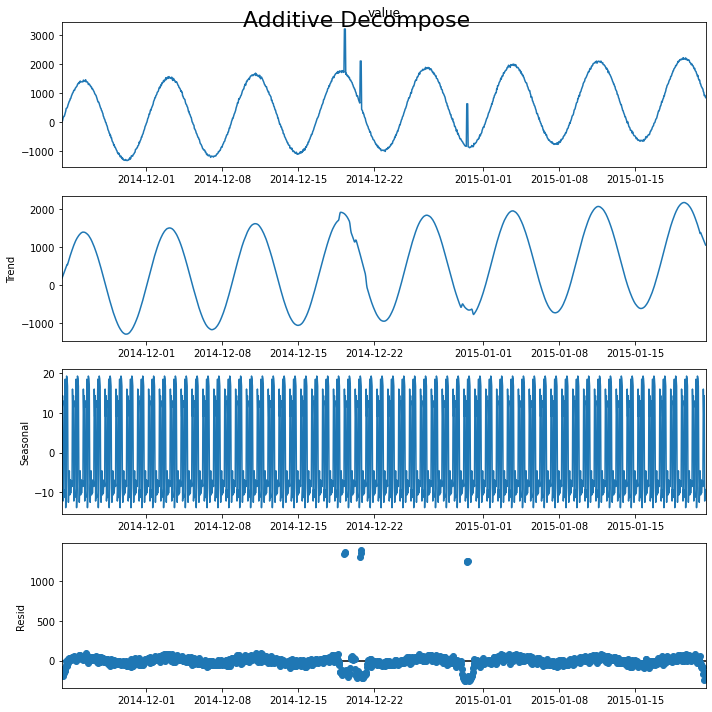



File: synthetic_2
threshold: 500
Outliers:
timestamp
2014-12-19 06:00:00    1336.141758
2014-12-19 07:00:00    1354.743755
2014-12-19 08:00:00    1362.022586
2014-12-20 17:00:00    1301.462227
2014-12-20 18:00:00    1347.539611
2014-12-20 19:00:00    1394.729580
2014-12-30 12:00:00    1244.776908
2014-12-30 13:00:00    1255.079829
2014-12-30 14:00:00    1255.735410
Name: resid, dtype: float64



A2Benchmark_synthetic_20add_STL


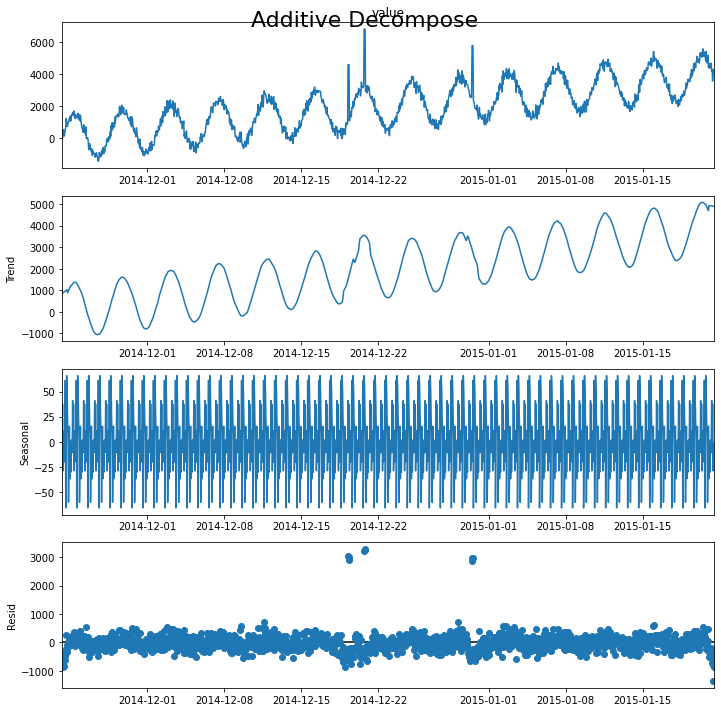



File: synthetic_20
threshold: 500
Outliers:
timestamp
2014-11-25 11:00:00     551.249943
2014-11-29 16:00:00     510.570394
2014-12-02 20:00:00     532.226013
2014-12-09 13:00:00     565.058796
2014-12-11 02:00:00     501.878878
2014-12-11 11:00:00     525.334884
2014-12-11 15:00:00     707.656900
2014-12-11 16:00:00     517.871707
2014-12-19 06:00:00    3032.112482
2014-12-19 07:00:00    3012.748989
2014-12-19 08:00:00    2888.293381
2014-12-20 17:00:00    3221.093357
2014-12-20 18:00:00    3249.429228
2014-12-20 19:00:00    3294.728459
2014-12-29 05:00:00     715.990557
2014-12-30 12:00:00    2878.439672
2014-12-30 13:00:00    2974.314414
2014-12-30 14:00:00    2991.739567
2015-01-02 08:00:00     588.672209
2015-01-02 15:00:00     585.996775
2015-01-03 08:00:00     559.694081
2015-01-15 23:00:00     594.686046
2015-01-16 00:00:00     598.558075
2015-01-20 11:00:00     547.445744
Name: resid, dtype: float64



A2Benchmark_synthetic_21add_STL


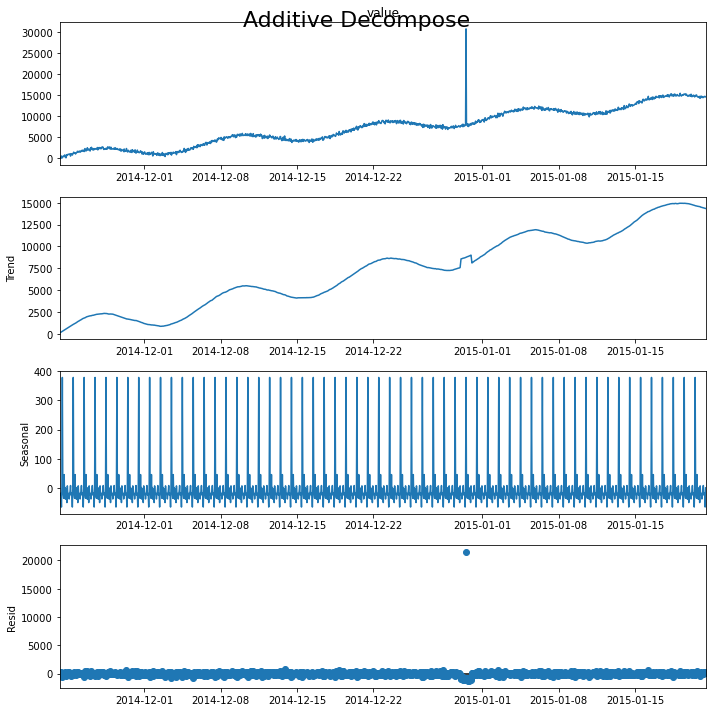



File: synthetic_21
threshold: 500
Outliers:
timestamp
2014-11-29 09:00:00      571.813444
2014-12-01 20:00:00      505.341062
2014-12-13 21:00:00      767.416955
2014-12-18 21:00:00      563.583673
2014-12-21 04:00:00      543.353804
2014-12-28 09:00:00      623.978209
2014-12-30 12:00:00    21550.896677
2015-01-02 10:00:00      609.646952
2015-01-06 04:00:00      504.264110
2015-01-13 11:00:00      502.757588
2015-01-14 00:00:00      514.009796
2015-01-16 05:00:00      665.962688
Name: resid, dtype: float64



A2Benchmark_synthetic_22add_STL


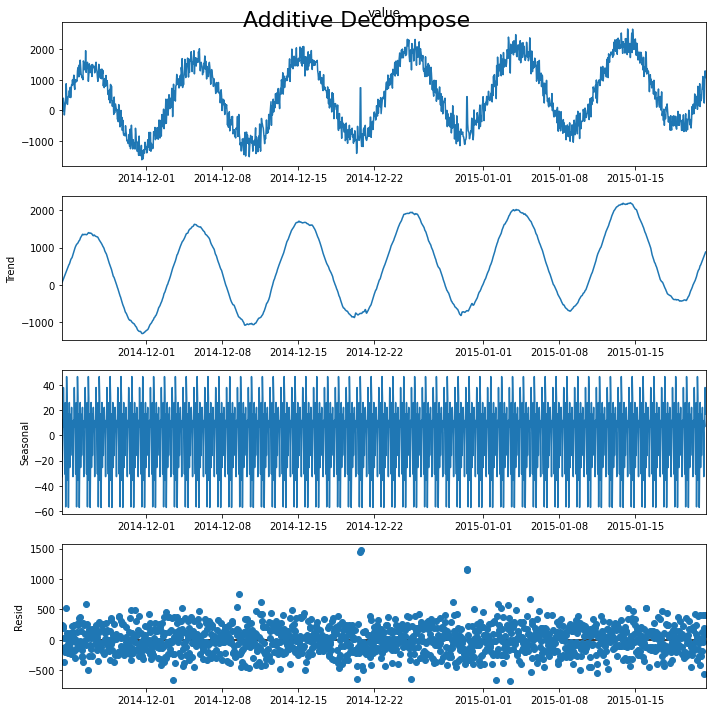



File: synthetic_22
threshold: 500
Outliers:
timestamp
2014-11-23 16:00:00     527.858507
2014-11-25 11:00:00     585.352726
2014-12-04 08:00:00     529.410373
2014-12-09 10:00:00     532.622709
2014-12-09 13:00:00     750.488923
2014-12-11 15:00:00     626.410056
2014-12-20 17:00:00    1446.657906
2014-12-20 18:00:00    1468.329618
2014-12-29 05:00:00     626.159432
2014-12-30 12:00:00    1141.111214
2014-12-30 13:00:00    1161.599383
2014-12-31 04:00:00     510.494395
2015-01-02 08:00:00     587.830825
2015-01-02 15:00:00     518.029876
2015-01-03 08:00:00     567.680685
2015-01-05 07:00:00     672.500216
2015-01-14 07:00:00     523.437345
2015-01-15 23:00:00     524.278781
2015-01-16 00:00:00     522.099593
Name: resid, dtype: float64


TypeError: can only concatenate str (not "datetime.datetime") to str

In [37]:
start_time = datetime.now() 
for index,file in enumerate(all_csv):
    if index%10 == 0:
        print(f'Processing index: {index} of {len(all_csv)}')
    if index > 15:
         break
    fname = file.split("\\")[1].split(".")[0]
    df = pd.read_csv(file)
    df['timestamp'] = pd.to_datetime(df['timestamp'],unit='s')
    df_indexed = df.set_index('timestamp')
    result_add = seasonal_decompose(df_indexed['value'], model='additive', extrapolate_trend='freq')
    # Plot
    plt.rcParams.update({'figure.figsize': (10,10)})
    result_add.plot().suptitle('Additive Decompose', fontsize=22)
    plt.savefig("./STLoutput/A2Benchmark_" + fname +"add_STL")
    print("\n\n\nA2Benchmark_" + fname +"add_STL")
    plt.show()
    threshold=500
    residualdf = result_add.resid
    outliers = residualdf[residualdf > threshold]
    with open("./STLoutput/"+ fname + ".txt", 'w') as file:
        file.write(f"\n\nFile: {fname}")
        file.write("\nthreshold: 500")
        file.write("\nOutliers:\n")
        file.write(outliers.to_csv())
        
        
    print(f"\n\nFile: {fname}")
    print("threshold: 500")
    print("Outliers:")
    print(outliers)
end_time=datetime.now()
print(f"STL Additive decomposition of Yahoo S5 A2 Benchmark processing complete. Time taken:{end_time-start_time}")

In [38]:
print(f"STL Additive decomposition of Yahoo S5 A2 Benchmark processing complete. Time taken:{end_time-start_time}")

STL Additive decomposition of Yahoo S5 A2 Benchmark processing complete. Time taken:0:00:27.692905
